In [1]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago_df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)
chicago_df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines = False)
chicago_df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines = False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\JAYSHREE RATHOD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [4]:
chicago_df = pd.concat([chicago_df1,chicago_df2,chicago_df3])

In [5]:
chicago_df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [7]:
chicago_df1.shape

(1923515, 23)

In [8]:
chicago_df.shape

(6068939, 23)

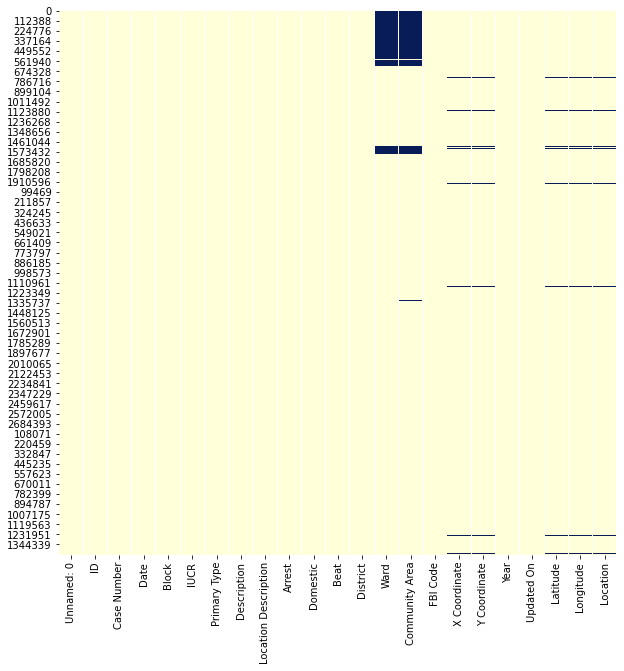

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [10]:
chicago_df_final = chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','Ward','Beat','Community Area','FBI Code','X Coordinate','Y Coordinate','Year','Updated On','Location','District','Latitude','Longitude'], axis=1)

In [11]:
chicago_df_final.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [12]:
chicago_df_final.Date = pd.to_datetime(chicago_df_final.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [20]:
chicago_df_final.index = pd.DatetimeIndex(chicago_df_final.Date)

In [21]:
chicago_df_final.Date

Date
2004-01-01 00:01:00   2004-01-01 00:01:00
2003-03-01 00:00:00   2003-03-01 00:00:00
2004-06-20 11:00:00   2004-06-20 11:00:00
2004-12-30 20:00:00   2004-12-30 20:00:00
2003-05-01 01:00:00   2003-05-01 01:00:00
                              ...        
2016-05-03 23:33:00   2016-05-03 23:33:00
2016-05-03 23:30:00   2016-05-03 23:30:00
2016-05-03 00:15:00   2016-05-03 00:15:00
2016-05-03 21:07:00   2016-05-03 21:07:00
2016-05-03 23:38:00   2016-05-03 23:38:00
Name: Date, Length: 6068939, dtype: datetime64[ns]

In [22]:
chicago_df_final

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [23]:
chicago_df_final['Primary Type'].value_counts()

THEFT                                1282951
BATTERY                              1101153
CRIMINAL DAMAGE                       691692
NARCOTICS                             646917
OTHER OFFENSE                         377581
ASSAULT                               370935
BURGLARY                              367480
MOTOR VEHICLE THEFT                   283534
ROBBERY                               234533
DECEPTIVE PRACTICE                    223728
CRIMINAL TRESPASS                     167580
WEAPONS VIOLATION                      61411
PROSTITUTION                           58499
PUBLIC PEACE VIOLATION                 45502
OFFENSE INVOLVING CHILDREN             39736
CRIM SEXUAL ASSAULT                    23619
SEX OFFENSE                            21962
GAMBLING                               13210
INTERFERENCE WITH PUBLIC OFFICER       12774
LIQUOR LAW VIOLATION                   12696
ARSON                                  10082
HOMICIDE                                7669
KIDNAPPING

In [24]:
chicago_df_final['Primary Type'].value_counts().iloc[:15] # first 15 data

THEFT                         1282951
BATTERY                       1101153
CRIMINAL DAMAGE                691692
NARCOTICS                      646917
OTHER OFFENSE                  377581
ASSAULT                        370935
BURGLARY                       367480
MOTOR VEHICLE THEFT            283534
ROBBERY                        234533
DECEPTIVE PRACTICE             223728
CRIMINAL TRESPASS              167580
WEAPONS VIOLATION               61411
PROSTITUTION                    58499
PUBLIC PEACE VIOLATION          45502
OFFENSE INVOLVING CHILDREN      39736
Name: Primary Type, dtype: int64

In [25]:
order_data = chicago_df_final['Primary Type'].value_counts().iloc[:15].index # first 15 cases type

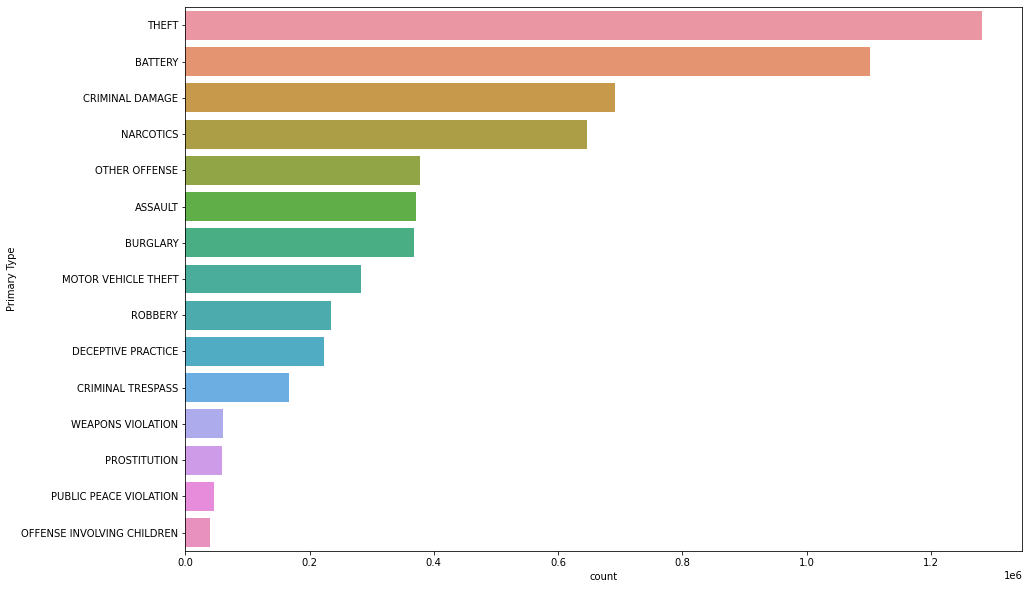

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Primary Type', data =chicago_df_final, order = order_data )

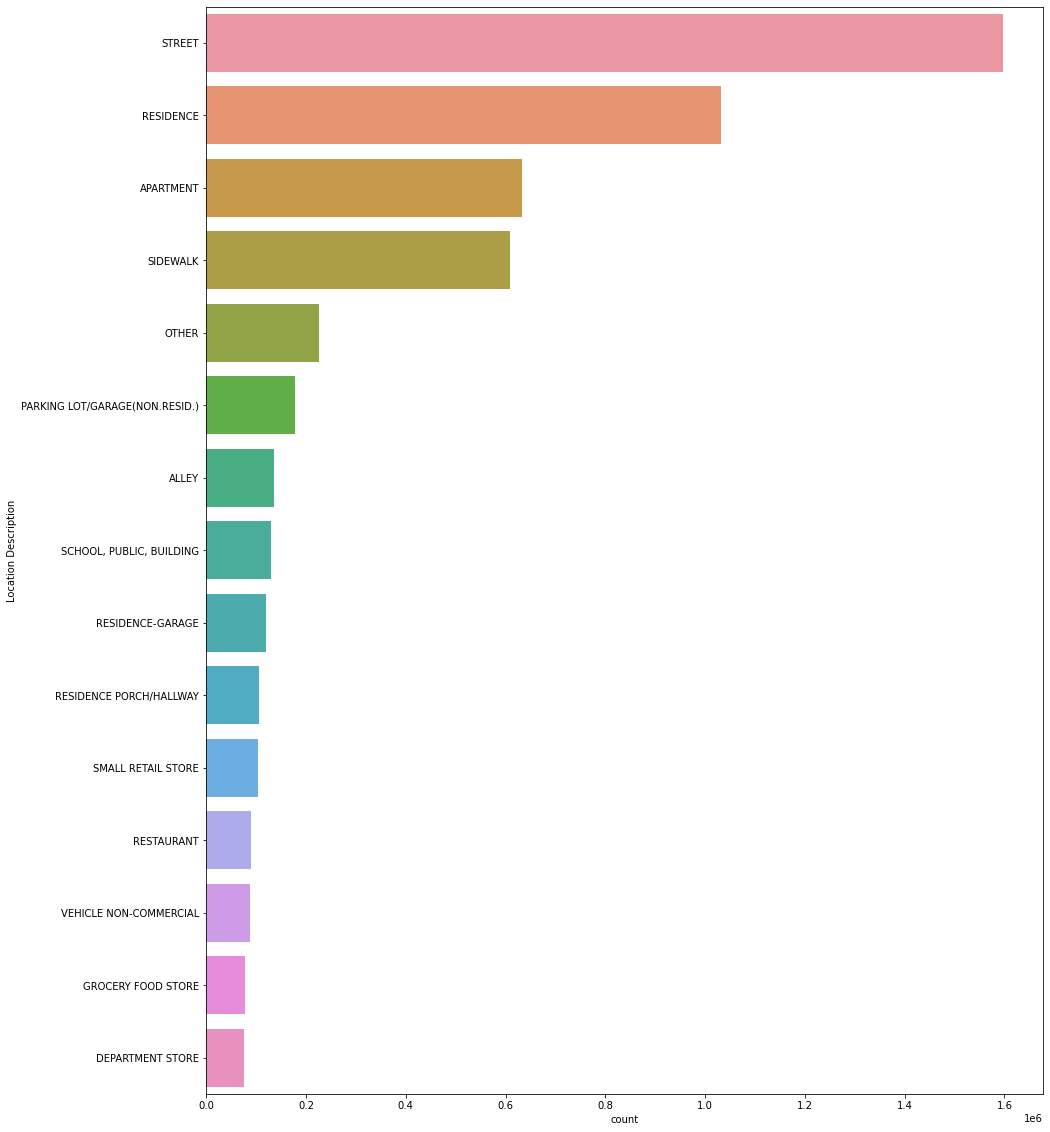

In [27]:
plt.figure(figsize = (15,20))
sns.countplot(y = 'Location Description', data = chicago_df_final, order = chicago_df_final['Location Description'].value_counts().iloc[:15].index )

In [28]:
chicago_df_final.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31         0
2006-12-31         0
2007-12-31         0
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

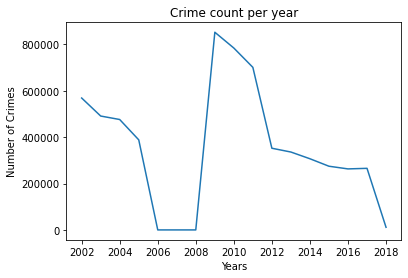

In [30]:
plt.plot(chicago_df_final.resample('Y').size())
plt.title('Crime count per year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes per month')

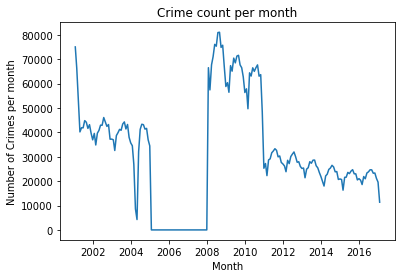

In [32]:
plt.plot(chicago_df_final.resample('M').size())
plt.title('Crime count per month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes per month')

Text(0, 0.5, 'Number of Crimes')

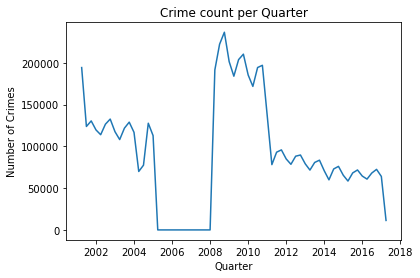

In [33]:
plt.plot(chicago_df_final.resample('Q').size())
plt.title('Crime count per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [34]:
# Prepare the data
chicago_prophet = chicago_df_final.resample('M').size().reset_index()

In [35]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [36]:
chicago_prophet.columns = ['Date','Crime Count']

In [37]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [40]:
chicago_prophet_df = chicago_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [41]:
chicago_prophet_df

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [42]:
m = Prophet()
m.fit(chicago_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,36803.870233,5909.286751,61521.762861,36803.870233,36803.870233,-1905.172248,-1905.172248,-1905.172248,-1905.172248,-1905.172248,-1905.172248,0.0,0.0,0.0,34898.697985
1,2001-02-28,36754.068923,3093.707482,60801.025048,36754.068923,36754.068923,-4024.931714,-4024.931714,-4024.931714,-4024.931714,-4024.931714,-4024.931714,0.0,0.0,0.0,32729.137209
2,2001-03-31,36698.931758,7916.107931,63139.602331,36698.931758,36698.931758,-1521.960260,-1521.960260,-1521.960260,-1521.960260,-1521.960260,-1521.960260,0.0,0.0,0.0,35176.971499
3,2001-04-30,36645.573212,6185.098524,60240.821486,36645.573212,36645.573212,-2519.885580,-2519.885580,-2519.885580,-2519.885580,-2519.885580,-2519.885580,0.0,0.0,0.0,34125.687632
4,2001-05-31,36590.436048,8632.829047,65618.417538,36590.436048,36590.436048,1378.598422,1378.598422,1378.598422,1378.598422,1378.598422,1378.598422,0.0,0.0,0.0,37969.034469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,26276.943885,3241.333490,59481.151759,26275.443294,26278.615880,6826.347888,6826.347888,6826.347888,6826.347888,6826.347888,6826.347888,0.0,0.0,0.0,33103.291773
554,2018-01-28,26275.272779,1678.186607,57322.184531,26273.767962,26276.952639,4985.120604,4985.120604,4985.120604,4985.120604,4985.120604,4985.120604,0.0,0.0,0.0,31260.393383
555,2018-01-29,26273.601673,-567.990966,57041.607899,26272.092629,26275.289077,2988.596214,2988.596214,2988.596214,2988.596214,2988.596214,2988.596214,0.0,0.0,0.0,29262.197887
556,2018-01-30,26271.930567,-1778.795317,53879.699211,26270.417297,26273.624300,868.025404,868.025404,868.025404,868.025404,868.025404,868.025404,0.0,0.0,0.0,27139.955971


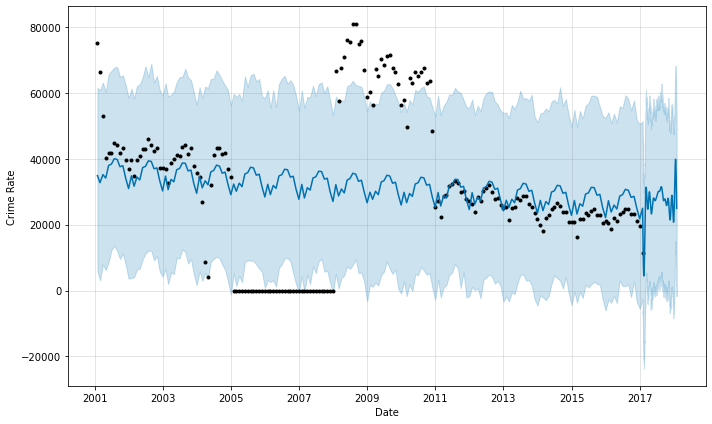

In [45]:
figure = m.plot(forecast, xlabel = 'Date',ylabel = 'Crime Rate')

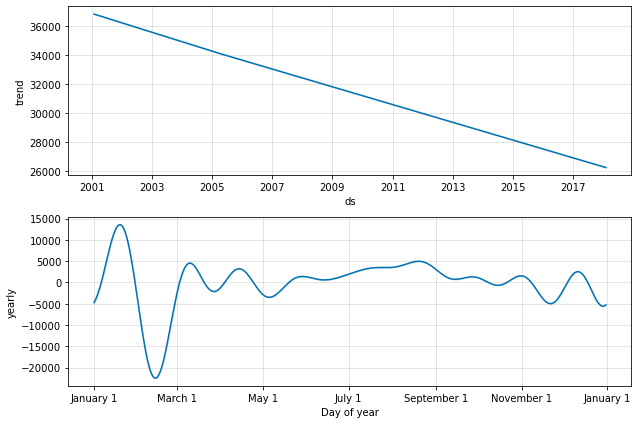

In [46]:
figure = m.plot_components(forecast)

In [47]:
#prediction for 2 years
future = m.make_future_dataframe(periods = 730)
forecast = m.predict(future)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,36803.870233,6358.386280,61916.449400,36803.870233,36803.870233,-1905.172248,-1905.172248,-1905.172248,-1905.172248,-1905.172248,-1905.172248,0.0,0.0,0.0,34898.697985
1,2001-02-28,36754.068923,5980.322640,61861.248923,36754.068923,36754.068923,-4024.931714,-4024.931714,-4024.931714,-4024.931714,-4024.931714,-4024.931714,0.0,0.0,0.0,32729.137209
2,2001-03-31,36698.931758,6355.144494,62625.137886,36698.931758,36698.931758,-1521.960260,-1521.960260,-1521.960260,-1521.960260,-1521.960260,-1521.960260,0.0,0.0,0.0,35176.971499
3,2001-04-30,36645.573212,5831.951504,60181.384900,36645.573212,36645.573212,-2519.885580,-2519.885580,-2519.885580,-2519.885580,-2519.885580,-2519.885580,0.0,0.0,0.0,34125.687632
4,2001-05-31,36590.436048,9335.480955,64130.863346,36590.436048,36590.436048,1378.598422,1378.598422,1378.598422,1378.598422,1378.598422,1378.598422,0.0,0.0,0.0,37969.034469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2019-01-27,25666.990110,7023.009802,62372.670997,25661.503587,25672.033488,7259.037661,7259.037661,7259.037661,7259.037661,7259.037661,7259.037661,0.0,0.0,0.0,32926.027771
919,2019-01-28,25665.319004,4099.541362,59925.454629,25659.825244,25670.371432,5461.138268,5461.138268,5461.138268,5461.138268,5461.138268,5461.138268,0.0,0.0,0.0,31126.457272
920,2019-01-29,25663.647898,-198.131698,53828.864252,25658.151628,25668.715140,3500.628930,3500.628930,3500.628930,3500.628930,3500.628930,3500.628930,0.0,0.0,0.0,29164.276828
921,2019-01-30,25661.976791,-2215.481849,53297.562650,25656.478364,25667.055716,1407.979899,1407.979899,1407.979899,1407.979899,1407.979899,1407.979899,0.0,0.0,0.0,27069.956690


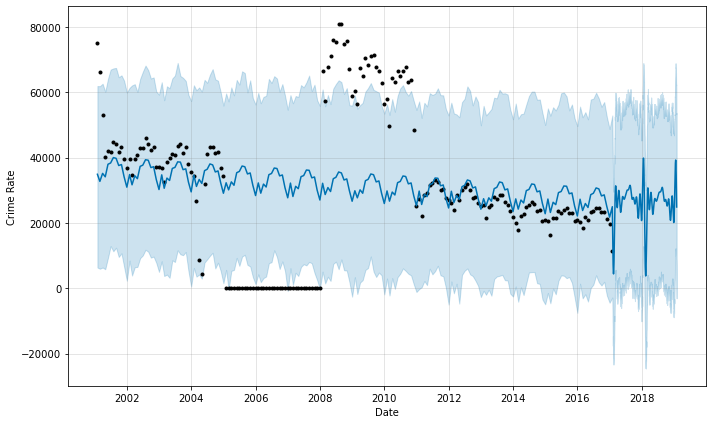

In [49]:
figure = m.plot(forecast, xlabel = 'Date',ylabel = 'Crime Rate')

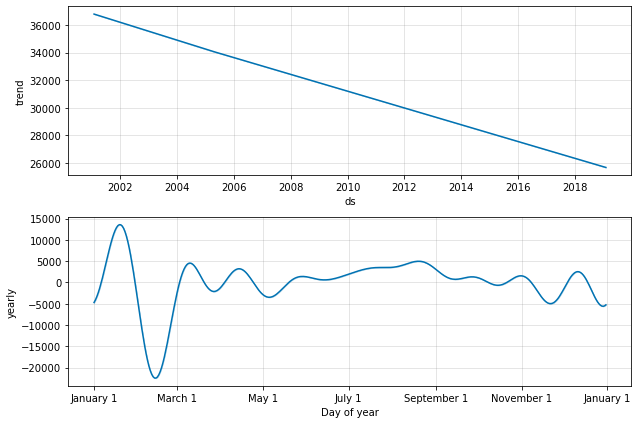

In [50]:
figure = m.plot_components(forecast)